In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Step1: Load Data 

In [2]:
df = pd.read_csv('AirPassengers.csv',parse_dates=['Month'], index_col=['Month'])

In [3]:
df.shape

(144, 1)

In [4]:
df = df.Passengers
df

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

<Axes: xlabel='Month'>

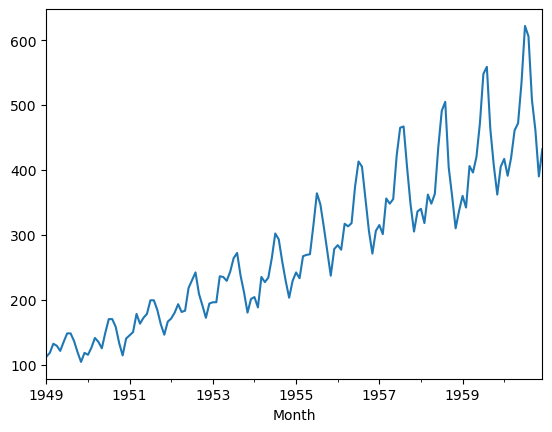

In [5]:
df.plot()

#### Data has trend, seasonality and non stationarity

In [6]:
import statsmodels.api as sm

In [7]:
decomposition = sm.tsa.seasonal_decompose(df)

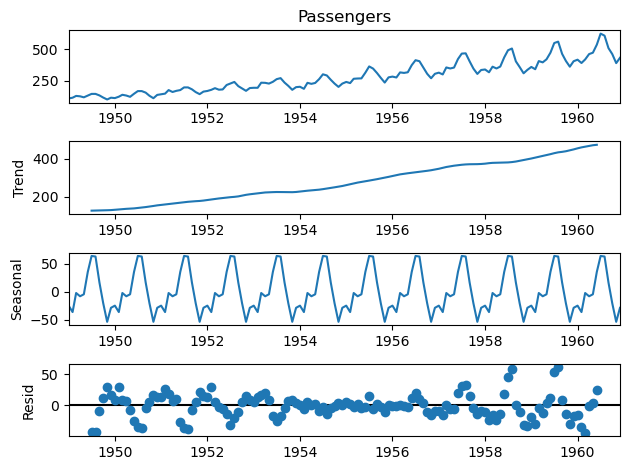

In [8]:
fig = decomposition.plot()
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
ts = df.values.reshape(144)

In [11]:
adftest = adfuller(ts)

In [12]:
adftest[1]

0.9918802434376411

<Axes: >

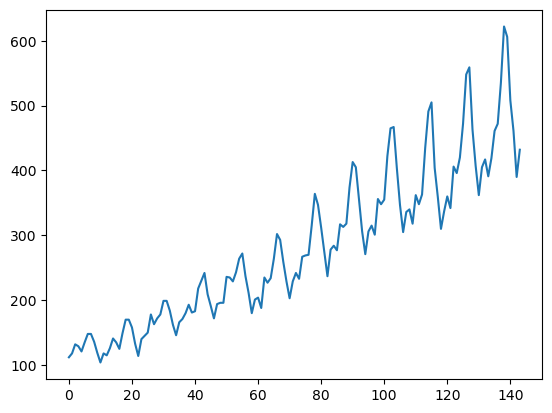

In [14]:

ts = pd.Series(ts)
ts.plot()

In [15]:
train_data = df[:120]
test_data= df[120:]

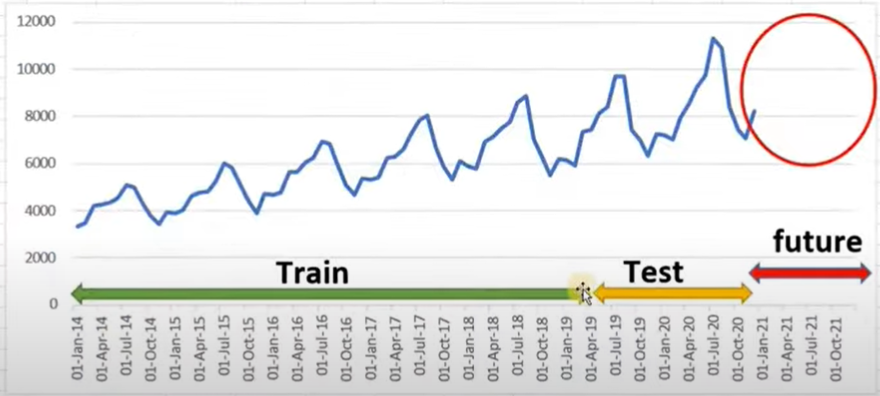

## ARIMA Model Building

#### Arima model has three components 
- 1. AR
- 2. MA
- 3. Integerated

For building ARIMA model we need the 
- AR order p
- MA order q
- Integerated order d

### Hyperparameters of ARIMA model (p,d,q)

In [16]:
# p=7, d=0,q=1

In [17]:
# How to get pdq, 3 different methods discussed below

## Build AIRMA model

In [18]:
from statsmodels.tsa.arima.model import ARIMA

In [19]:
model  = ARIMA(train_data,order=(7,0,1)).fit()

C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Preddict on Test Data

In [20]:
len(train_data),len(df)-1

(120, 143)

In [21]:
pred = model.predict(start=len(train_data),end=(len(df)-1))

## Model EVALUATION

In [22]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(pred,test_data))

123.23121766612907

In [26]:
test_data.mean(), np.sqrt(test_data.var())

(452.25, 76.2833676099387)

<Axes: xlabel='Month'>

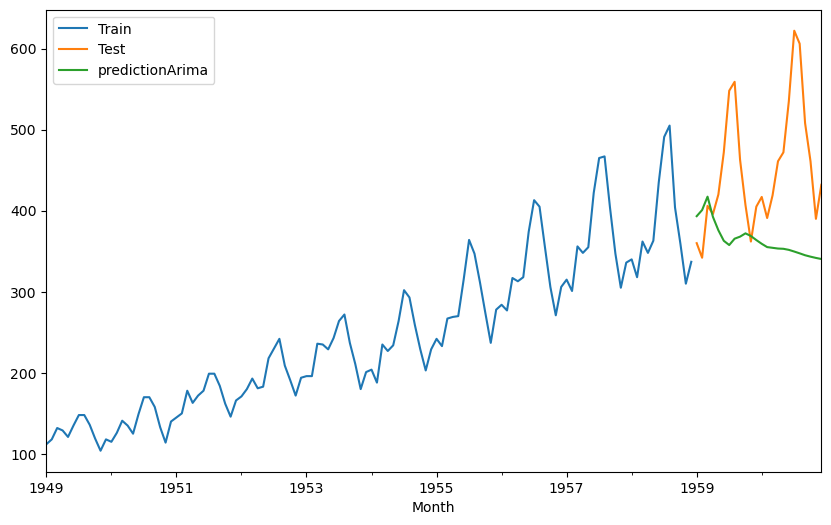

In [28]:
train_data.plot(legend=True, label='Train',figsize=(10,6))
test_data.plot(legend=True,label='Test')
pred.plot(legend=True,label='predictionArima')

# Final Model

In [29]:
len(df),len(df)+6

(144, 150)

C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\abc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

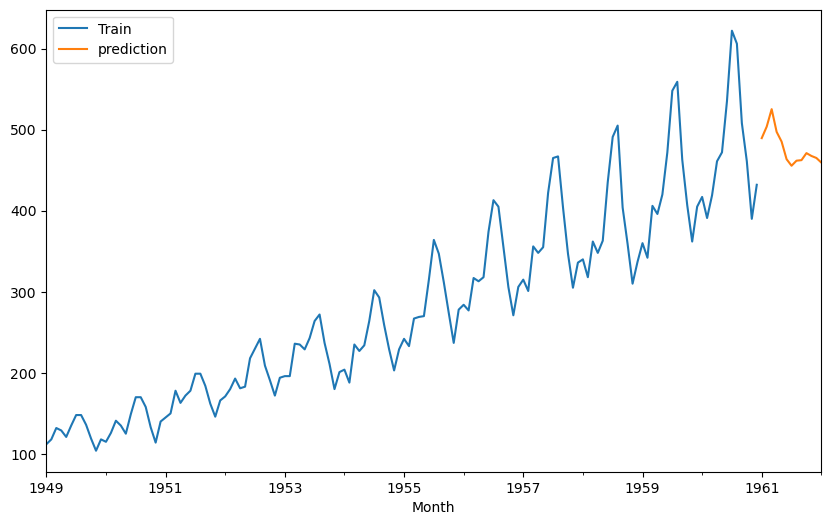

In [30]:
finalmodel = ARIMA(df,order=(7,0,1)).fit()
prediction=finalmodel.predict(len(df),len(df)+12)
df.plot(legend=True,label='Train',figsize=(10,6))
prediction.plot(legend=True, label='prediction')

#### How to get ARIMA Hyperparameters pdq 

In [31]:
import itertools

In [32]:
p=range(0,8)
d=range(0,8)
q= range(0,2)

In [33]:
pdq_combinations  = list(itertools.product(p,d,q))

In [34]:
len(pdq_combinations)

128

In [35]:
rmse=[]
order1 = []

In [36]:
for pdq in pdq_combinations:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred = model.predict(start=len(train),end=len(ts)-1)
        error = np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

In [37]:
result = pd.DataFrame(index=order1,data=rmse,columns=['rmse'])

In [38]:
result.rmse.sort_values()

Series([], Name: rmse, dtype: object)